In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

In [2]:
print(df.shape)

(150, 5)


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


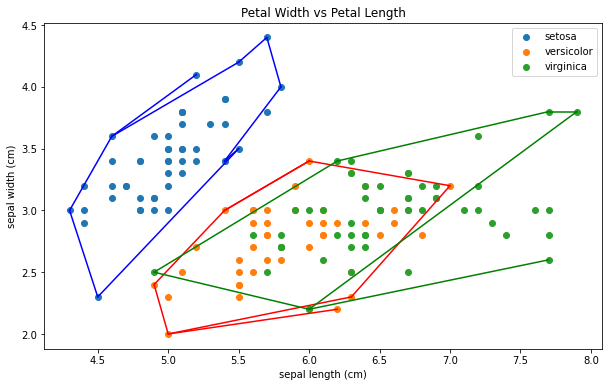

In [4]:
#visualisasi hasil ConvexHull
import myConvexHull

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    warna = i
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    bucket = sorted(bucket, key=lambda x: (x[0], x[1]))

    initial_point = bucket[0]
    final_point = bucket[len(bucket)-1]

    part1 = []
    part2 = []
    for i in range(len(bucket)):
        if (myConvexHull.kiri(initial_point, final_point, bucket[i])):
            part1.append(bucket[i])
        elif (myConvexHull.kanan(initial_point, final_point, bucket[i])):
            part2.append(bucket[i])
    
    all_part = []
    total_part = 0
    hull = []
    myConvexHull.divideandconquer(all_part, part1, initial_point, final_point, hull)
    myConvexHull.divideandconquer(all_part, part2, initial_point, final_point, hull)
    
    for i in range(len(hull)):
        x_values = [hull[i][0][0], hull[i][1][0]]
        y_values = [hull[i][0][1], hull[i][1][1]]
        plt.plot(x_values, y_values, colors[warna])

plt.legend()